Name: Balsa Rohith

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [4]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
y_train[0]

9

In [9]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

In [10]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

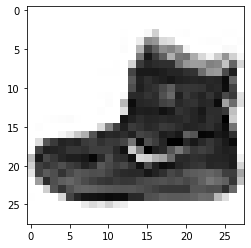

In [11]:
plt.imshow(X_train[0],cmap='Greys')

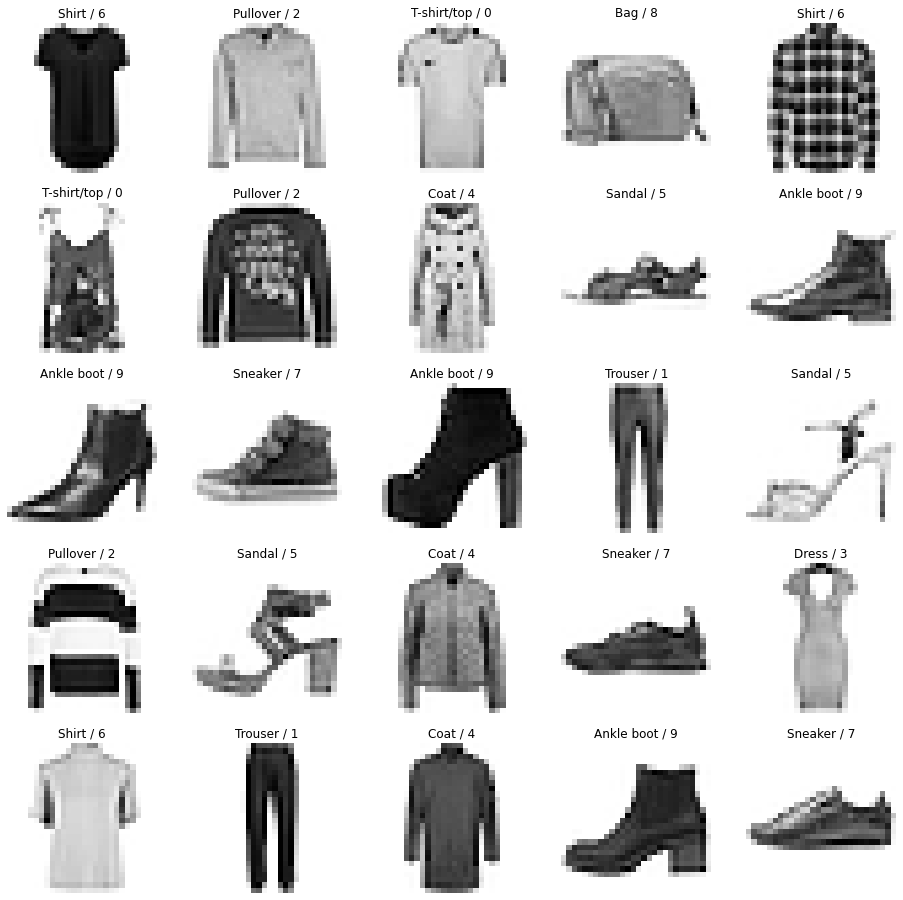

In [12]:
plt.figure(figsize=(16,16))

j=1
for  i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [13]:
X_train.ndim

3

In [14]:
X_train = np.expand_dims(X_train,-1)

In [15]:
X_train.ndim

4

In [16]:
X_test=np.expand_dims(X_test,-1)

 feature scaling

In [17]:
X_train = X_train/255
X_test= X_test/255

# Split dataset

In [18]:
from sklearn.model_selection import  train_test_split


In [19]:
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [20]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

 Buiding the CNN model


---



In [21]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 20s 200ms/step - loss: 0.6138 - accuracy: 0.7942 - val_loss: 0.4181 - val_accuracy: 0.8546
Epoch 2/10
94/94 [==============================] - 18s 195ms/step - loss: 0.3734 - accuracy: 0.8685 - val_loss: 0.3630 - val_accuracy: 0.8724
Epoch 3/10
94/94 [==============================] - 19s 200ms/step - loss: 0.3291 - accuracy: 0.8854 - val_loss: 0.3305 - val_accuracy: 0.8863
Epoch 4/10
94/94 [==============================] - 19s 200ms/step - loss: 0.3019 - accuracy: 0.8939 - val_loss: 0.3223 - val_accuracy: 0.8880
Epoch 5/10
94/94 [==============================] - 18s 196ms/step - loss: 0.2797 - accuracy: 0.9014 - val_loss: 0.3094 - val_accuracy: 0.8918
Epoch 6/10
94/94 [==============================] - 18s 196ms/step - loss: 0.2638 - accuracy: 0.9074 - val_loss: 0.3032 - val_accuracy: 0.8929
Epoch 7/10
94/94 [==============================] - 19s 204ms/step - loss: 0.2477 - accuracy: 0.9116 - val_loss: 0.3005 - val_accuracy: 0.8947

In [25]:
y_pred = model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.94, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.05, 0.04, 0.01]], dtype=float32)

In [26]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2739 - accuracy: 0.9010


[0.27386531233787537, 0.9010000228881836]

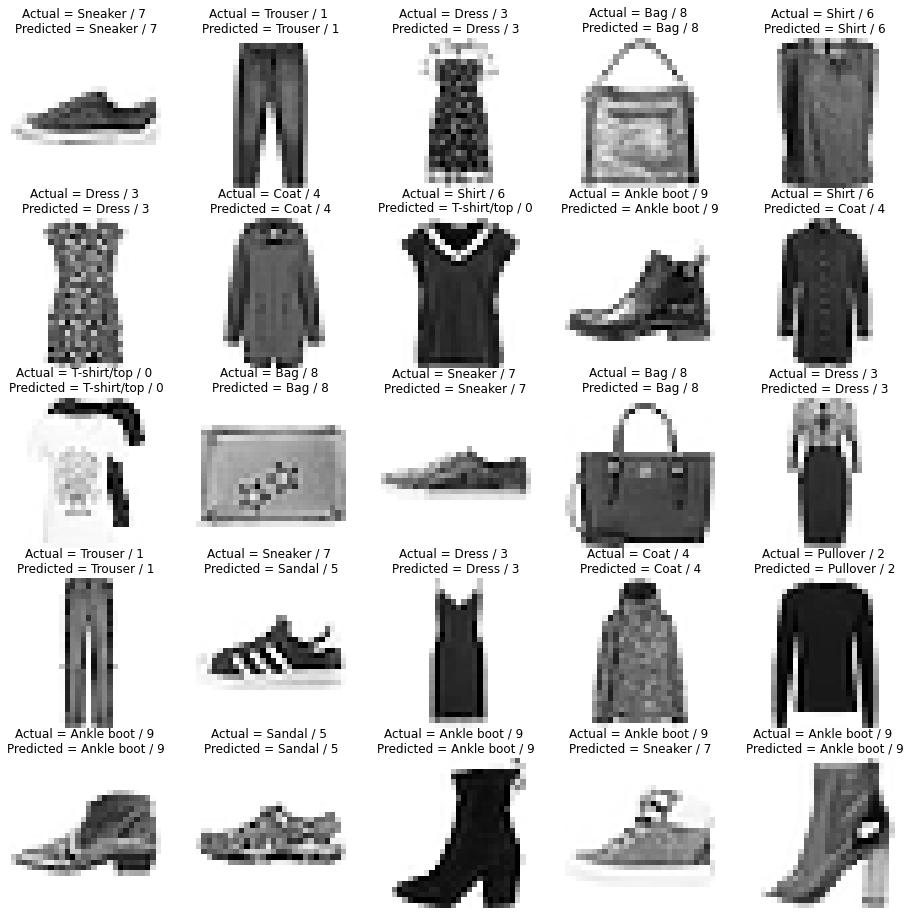

In [28]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

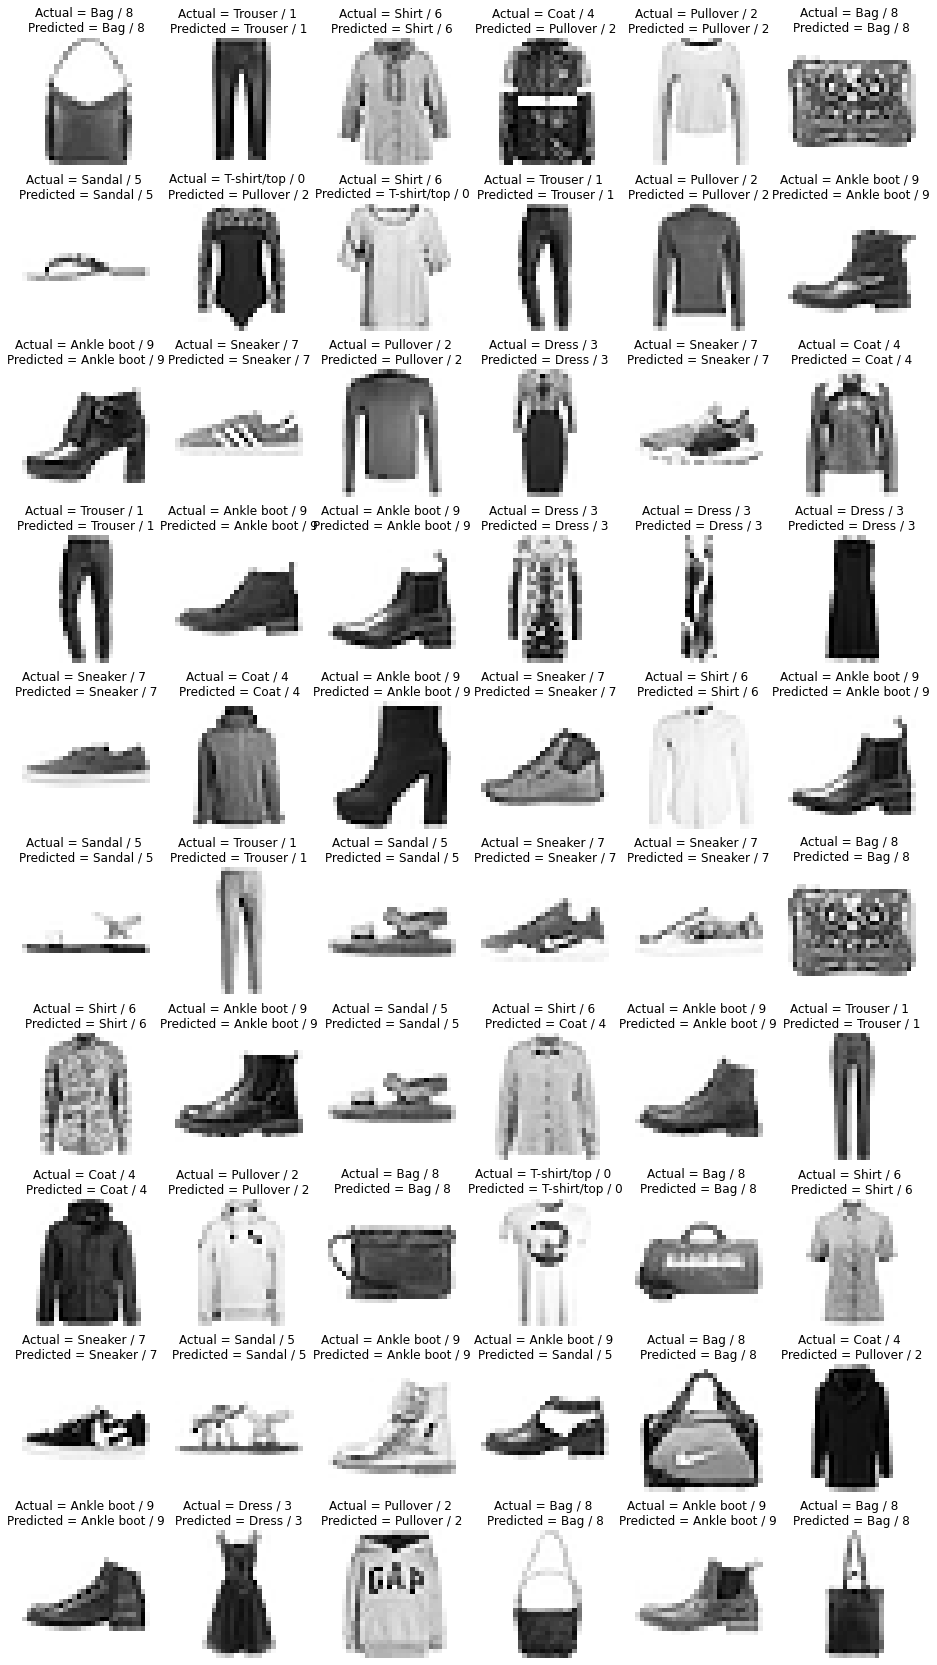

In [29]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [30]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.80      0.88      0.84      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.85      0.84      0.84      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.79      0.65      0.71      1000
     Sneaker       0.96      0.95      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



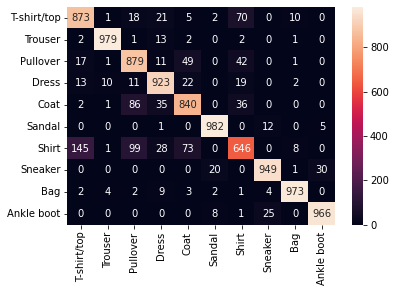

In [31]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

Save Model

In [32]:
model.save('fashion_mnist_cnn_model.h5')

#Build 2 complex CNN

In [33]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [35]:
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')

 


Epoch 1/20
94/94 [==============================] - 24s 249ms/step - loss: 0.2023 - accuracy: 0.9244 - val_loss: 0.2655 - val_accuracy: 0.9081
Epoch 2/20
94/94 [==============================] - 23s 246ms/step - loss: 0.1922 - accuracy: 0.9286 - val_loss: 0.2774 - val_accuracy: 0.9043
Epoch 3/20
94/94 [==============================] - 23s 247ms/step - loss: 0.1857 - accuracy: 0.9318 - val_loss: 0.2676 - val_accuracy: 0.9110
Epoch 4/20
94/94 [==============================] - 23s 246ms/step - loss: 0.1812 - accuracy: 0.9330 - val_loss: 0.2641 - val_accuracy: 0.9118
Epoch 5/20
94/94 [==============================] - 23s 245ms/step - loss: 0.1721 - accuracy: 0.9369 - val_loss: 0.2731 - val_accuracy: 0.9087
Epoch 6/20
94/94 [==============================] - 23s 246ms/step - loss: 0.1714 - accuracy: 0.9365 - val_loss: 0.2655 - val_accuracy: 0.9097
Epoch 7/20
94/94 [==============================] - 23s 246ms/step - loss: 0.1686 - accuracy: 0.9369 - val_loss: 0.2715 - val_accuracy: 0.9061